In [90]:
from random import randint, random
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

init_printing()

# Define symbols
x, u, dx = symbols('x u dx')

In [91]:
# Generates a random integral
def generateIntegral() -> Integral:
    functions = [sin(x), cos(x), exp(x), log(x), x, x**2, x**3, x**4]
    f = random.choice(functions)
    for i in range(random.randint(1, 6)):
        op = random.choice([Add, Mul])
        if op == Add:
            f += random.choice(functions)
        else:
            f *= random.choice(functions)
    a = random.randint(-50, 50)
    b = random.randint(-50, 50)
    if a > b:
        a, b = b, a
    integral = Integral(f, (x, a, b))
    return integral


In [92]:
def display_integral(integral: Integral) -> None:
    """Displays a graph of the given integral, with the area under the curve colored."""
    f = integral.function
    a = integral.limits[0][1]   
    b = integral.limits[0][2]    
    
    # Convert the function to a numpy function
    f_np = lambdify(x, f, "numpy")
    
    # Create a NumPy array of x-values to plot
    x_vals = np.linspace(float(a), float(b), 1000)

    # Evaluate the function at each x-value
    y_vals = f_np(x_vals)

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Fill the area under the curve
    ax.fill_between(x_vals, y_vals, color='blue', alpha=0.3)

    # Plot the function
    ax.plot(x_vals, y_vals, color='blue')

    # Set the axis labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Set the title of the plot
    ax.set_title("Integral: " + str(integral))

    # Show the plot
    plt.show()

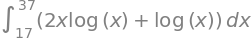

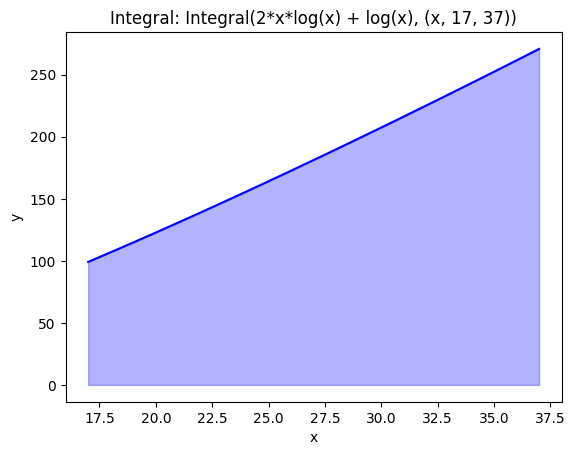

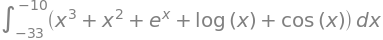

<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in log
  return x**3 + x**2 + exp(x) + log(x) + cos(x)


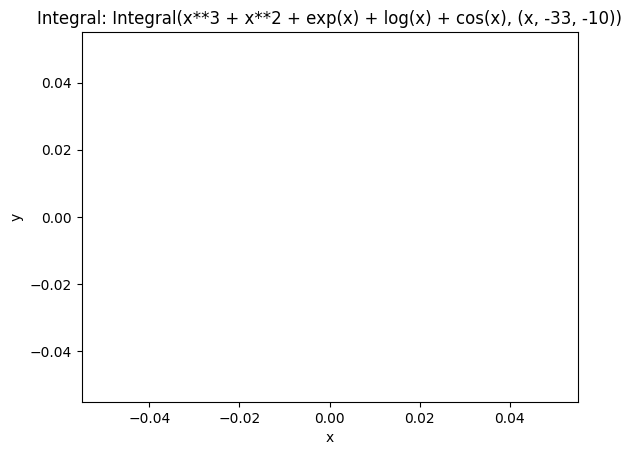

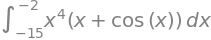

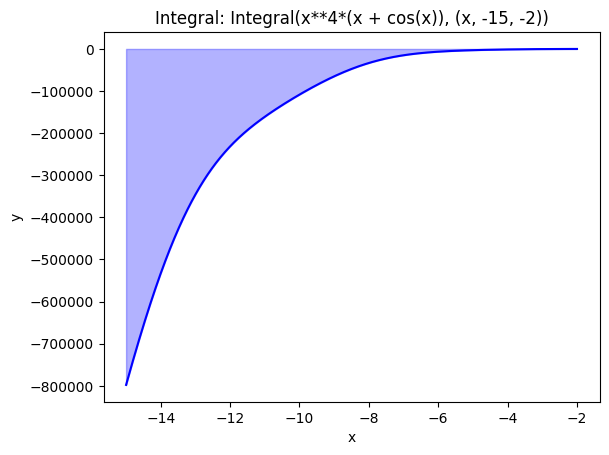

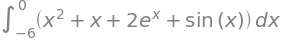

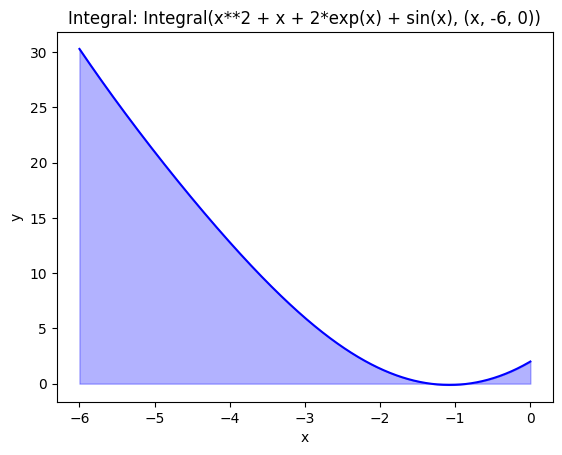

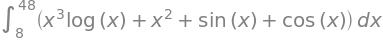

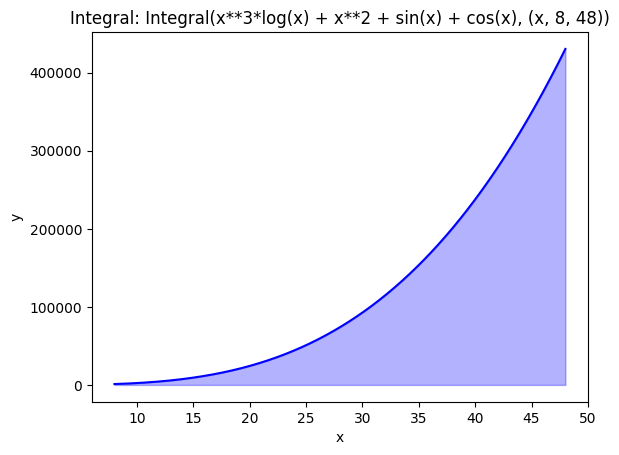

In [93]:
for i in range(0,5):
    newIntegral = generateIntegral()
    display(newIntegral)
    display_integral(newIntegral)

In [94]:
def random_function():
    """Generates a random function to be used in a u-substitution."""
    f = random.choice([sin(x), cos(x), exp(x), log(x)])
    return f

In [ ]:
def generate_function2(depth: int) -> Expr:
    """Generates a random function of the given depth."""
    if depth == 0:
        # Base case: return a random polynomial or transcendental function
        p = randint(1, 3)
        if p == 1:
            return Rational(randint(-5, 5), randint(1, 5)) + randrange(-5, 6)*x
        elif p == 2:
            return exp(randint(-5, 5)*x)
        else:
            return sin(randint(-5, 5)*x)
    else:
        # Recursive case: combine random subfunctions with sums or products
        p = randint(1, 2)
        if p == 1:
            # Sum case
            return generate_function(depth-1) + generate_function(depth-1)
        else:
            # Product case
            return generate_function(depth-1) * generate_function(depth-1)

In [95]:
def perform_usub(integral, u_sub_fn):
    """Performs a u-substitution on the given integral using the specified function."""
    u_val = u_sub_fn(x)
    u_sub = u_val.subs(x, u)
    du = diff(u_sub, u) * dx
    new_integral = integral.subs(x, u_val) * du
    new_a = new_integral.limit(u, 0).args[0][1].subs(u, u_val)
    new_b = new_integral.limit(u, 0).args[0][2].subs(u, u_val)
    new_integral = Integral(new_integral.args[0], (u, new_a, new_b))
    return new_integral

In [96]:
def perform_multiple_usubs(integral, num_subs):
    """Performs the specified number of u-substitutions on the given integral using random functions."""
    frames = [integral]
    for i in range(num_subs):
        # Generate a random function for the u-substitution
        u_sub_fn = random_function()

        # Perform the u-substitution on the integral
        new_integral = perform_usub(integral, u_sub_fn)

        # Add the new integral to the list of frames
        frames.append(new_integral)

        # Set the new integral as the current integral for the next iteration
        integral = new_integral
    
    return frames


In [97]:
integral = generate_integral()

# Display the initial integral
display(integral)

# Perform 5 random u-substitutions on the integral
frames = perform_multiple_usubs(integral, 5)

# Display the sequence of integrals with u-substitutions applied
for frame in frames:
    display(frame)

NameError: name 'generate_integral' is not defined